In [1]:
import torch
torch.set_grad_enabled(False)

import matplotlib as mpl
import matplotlib.pyplot as plt

from math import pi
from Activation import ReLU, Tanh
from Layer import Linear
from Sequential import Sequential
from Loss import LossMSE

In [2]:
def test_accuracy(model, test_input, test_target):
    
    output = model.forward(test_input)
    
    output[output >= 0] = 1
    output[output < 0] = -1
    goodValue = torch.full((len(output), 1), 0, dtype=torch.float32)
    goodValue[output == test_target] = 1
    return goodValue.sum()/len(goodValue)

In [3]:
loss = LossMSE()
model = Sequential(
            Linear(2, 25),
            ReLU(),
            Linear(25, 50),
            ReLU(),
            Linear(50, 50),
            ReLU(),
            Linear(50, 25),
            ReLU(),
            Linear(25, 1),
            Tanh()
        )

In [4]:
train_input = torch.rand((1000,2))
train_target = torch.rand((1000,1))
train_target[((train_input-0.5)**2).sum(1) < 1/(2*pi)] = -1 
train_target[((train_input-0.5)**2).sum(1) >= 1/(2*pi)] = 1

test_input = torch.rand((1000,2))
test_target = torch.rand((1000,1))
test_target[((test_input-0.5)**2).sum(1) < 1/(2*pi)] = -1 
test_target[((test_input-0.5)**2).sum(1) >= 1/(2*pi)] = 1

#Normalization
mu, std = train_input.mean(0), train_input.std(0)
train_input.sub_(mu).div_(std)
print(test_input)
print(mu,std)
test_input.sub_(mu).div_(std)
print(test_input)

tensor([[0.4629, 0.0736],
        [0.8417, 0.5877],
        [0.4059, 0.4887],
        ...,
        [0.4933, 0.2133],
        [0.5647, 0.9587],
        [0.6682, 0.9696]])
tensor([0.4833, 0.4963]) tensor([0.2849, 0.2892])
tensor([[-0.0715, -1.4616],
        [ 1.2578,  0.3162],
        [-0.2715, -0.0263],
        ...,
        [ 0.0351, -0.9786],
        [ 0.2858,  1.5992],
        [ 0.6491,  1.6368]])


In [11]:
epochs = 10000
for i in range(epochs):

    output = model.forward(train_input)

    gradwrrtxL = loss.backward(output, train_target)
    model.backward(gradwrrtxL)

    if i % 10 == 0:
        test_accuracyV = test_accuracy(model, test_input, test_target)
        print(f"E {i} Loss : {loss.forward(output, train_target):.2f} / train accuracy: {test_accuracy(model, train_input, train_target):.2f} / test accuracy: {test_accuracyV:.2f}")

E 0 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 10 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 20 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 30 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 40 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 50 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 60 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 70 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 80 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 90 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 100 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 110 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 120 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 130 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 140 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 150 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 1

E 1320 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 1330 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 1340 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 1350 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 1360 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 1370 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 1380 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 1390 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 1400 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 1410 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 1420 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 1430 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 1440 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 1450 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 1460 Loss : 0.06 / train accuracy: 0.98 / test accuracy: 0.98
E 1470 Loss : 0.06 / train accuracy: 0.9

E 2610 Loss : 0.07 / train accuracy: 0.97 / test accuracy: 0.97
E 2620 Loss : 0.07 / train accuracy: 0.97 / test accuracy: 0.97
E 2630 Loss : 0.07 / train accuracy: 0.97 / test accuracy: 0.97
E 2640 Loss : 0.07 / train accuracy: 0.97 / test accuracy: 0.97
E 2650 Loss : 0.07 / train accuracy: 0.97 / test accuracy: 0.97
E 2660 Loss : 0.07 / train accuracy: 0.97 / test accuracy: 0.97
E 2670 Loss : 0.07 / train accuracy: 0.97 / test accuracy: 0.97
E 2680 Loss : 0.07 / train accuracy: 0.97 / test accuracy: 0.97
E 2690 Loss : 0.07 / train accuracy: 0.97 / test accuracy: 0.97
E 2700 Loss : 0.07 / train accuracy: 0.97 / test accuracy: 0.97
E 2710 Loss : 0.07 / train accuracy: 0.97 / test accuracy: 0.97
E 2720 Loss : 0.07 / train accuracy: 0.97 / test accuracy: 0.97
E 2730 Loss : 0.07 / train accuracy: 0.97 / test accuracy: 0.97
E 2740 Loss : 0.07 / train accuracy: 0.97 / test accuracy: 0.98
E 2750 Loss : 0.07 / train accuracy: 0.97 / test accuracy: 0.98
E 2760 Loss : 0.07 / train accuracy: 0.9

E 3940 Loss : 0.08 / train accuracy: 0.97 / test accuracy: 0.97
E 3950 Loss : 0.08 / train accuracy: 0.97 / test accuracy: 0.97
E 3960 Loss : 0.08 / train accuracy: 0.97 / test accuracy: 0.97
E 3970 Loss : 0.08 / train accuracy: 0.97 / test accuracy: 0.98
E 3980 Loss : 0.08 / train accuracy: 0.97 / test accuracy: 0.97
E 3990 Loss : 0.09 / train accuracy: 0.97 / test accuracy: 0.97
E 4000 Loss : 0.09 / train accuracy: 0.97 / test accuracy: 0.97
E 4010 Loss : 0.09 / train accuracy: 0.96 / test accuracy: 0.97
E 4020 Loss : 0.09 / train accuracy: 0.96 / test accuracy: 0.97
E 4030 Loss : 0.10 / train accuracy: 0.96 / test accuracy: 0.97
E 4040 Loss : 0.10 / train accuracy: 0.96 / test accuracy: 0.97
E 4050 Loss : 0.11 / train accuracy: 0.96 / test accuracy: 0.97
E 4060 Loss : 0.12 / train accuracy: 0.96 / test accuracy: 0.97
E 4070 Loss : 0.12 / train accuracy: 0.96 / test accuracy: 0.97
E 4080 Loss : 0.12 / train accuracy: 0.95 / test accuracy: 0.97
E 4090 Loss : 0.12 / train accuracy: 0.9

E 5240 Loss : 0.89 / train accuracy: 0.82 / test accuracy: 0.82
E 5250 Loss : 0.91 / train accuracy: 0.82 / test accuracy: 0.81
E 5260 Loss : 0.92 / train accuracy: 0.81 / test accuracy: 0.81
E 5270 Loss : 0.94 / train accuracy: 0.81 / test accuracy: 0.80
E 5280 Loss : 0.96 / train accuracy: 0.80 / test accuracy: 0.80
E 5290 Loss : 0.98 / train accuracy: 0.80 / test accuracy: 0.80
E 5300 Loss : 1.00 / train accuracy: 0.80 / test accuracy: 0.80
E 5310 Loss : 1.02 / train accuracy: 0.80 / test accuracy: 0.80
E 5320 Loss : 1.04 / train accuracy: 0.80 / test accuracy: 0.80
E 5330 Loss : 1.06 / train accuracy: 0.80 / test accuracy: 0.80
E 5340 Loss : 1.07 / train accuracy: 0.80 / test accuracy: 0.81
E 5350 Loss : 1.09 / train accuracy: 0.81 / test accuracy: 0.81
E 5360 Loss : 1.10 / train accuracy: 0.81 / test accuracy: 0.81
E 5370 Loss : 1.12 / train accuracy: 0.81 / test accuracy: 0.81
E 5380 Loss : 1.13 / train accuracy: 0.81 / test accuracy: 0.81
E 5390 Loss : 1.14 / train accuracy: 0.8

E 6550 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 6560 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 6570 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 6580 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 6590 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 6600 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 6610 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 6620 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 6630 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 6640 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 6650 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 6660 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 6670 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 6680 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 6690 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 6700 Loss : 2.04 / train accuracy: 0.4

E 7850 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 7860 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 7870 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 7880 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 7890 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 7900 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 7910 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 7920 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 7930 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 7940 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 7950 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 7960 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 7970 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 7980 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 7990 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 8000 Loss : 2.04 / train accuracy: 0.4

E 9180 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 9190 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 9200 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 9210 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 9220 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 9230 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 9240 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 9250 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 9260 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 9270 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 9280 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 9290 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 9300 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 9310 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 9320 Loss : 2.04 / train accuracy: 0.49 / test accuracy: 0.49
E 9330 Loss : 2.04 / train accuracy: 0.4

In [ ]:
test = model.forward(test_input)
test[test > 0] = 1
test[test <= 0] = -1

In [ ]:
for i in range(1000):
    print(test[i], test_target[i])

In [9]:
size = (1000, 1000)
colorMap = torch.empty(size)

for i in range(size[1]):
    
    input_ = torch.full((size[0], 2), i/1000)
    for j in range(size[0]):
        input_[j, 0] = j/1000
    input_.sub_(mu).div_(std)
    
    output = model.forward(input_).reshape((size[0]))
    colorMap[:, i] = output
    

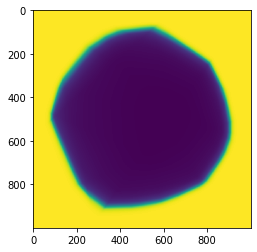

In [10]:

plt.imshow(colorMap)